<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Day-3-Planck-problem" data-toc-modified-id="Day-3-Planck-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Day 3 Planck problem</a></span></li><li><span><a href="#Answer----check-for-Temp=300-K" data-toc-modified-id="Answer----check-for-Temp=300-K-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Answer -- check for Temp=300 K</a></span></li><li><span><a href="#so-good-agreement-with-10000-points----make-a-plot-as-well" data-toc-modified-id="so-good-agreement-with-10000-points----make-a-plot-as-well-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>so good agreement with 10000 points -- make a plot as well</a></span></li></ul></div>

### Day 3 Planck problem

Verify using np.sum that:

 $$\int_0^\infty  E^*_\lambda(T)d\lambda   =\int_0^\infty \frac{\pi h c^2}{\lambda^5 \left [ \exp (h c/(\lambda k_B T )) -1 \right ] } d\lambda = \int_0^\infty \frac{c_1}{\lambda^5 \left [ \exp (c_2/(\lambda T )) -1 \right ] } d\lambda  = \sigma_{SB} T^4$$
 
For a temperature of 300 K.

### Answer -- check for Temp=300 K

In [5]:
import numpy as np
from matplotlib import pyplot as plt

#
# get Stull's c_1 and c_2 from fundamental constants
#
c=2.99792458e+08  #m/s -- speed of light in vacuum
h=6.62606876e-34  #J s  -- Planck's constant
kb=1.3806503e-23  # J/K  -- Boltzman's constant
c=3.e8  #speed of light in vacuum (m/s)
c1=2.*h*c**2.*np.pi
c2=h*c/kb
sigma=2.*np.pi**5.*kb**4./(15*h**3.*c**2.)

def planckwavelen(wavel,Temp):
    """
    Calculate the blackbody radiant exitence (Stull 2.13)
    
    Parameters
    ----------
    
      wavel: float or array
           wavelength (meters)
           
      Temp: float
           temperature (K)
           
    Returns
    -------
    
    Elambda:  float or arr
           monochromatic radiant exitence (W/m^2/m)
    """
    Elambda=c1/(wavel**5.*(np.exp(c2/(wavel*Temp)) -1))
    print(c1,c2)
    return Elambda

Temp = 255.
SBflux = sigma*Temp**4.
print('stefan-boltzman says flux is {:8.3f} W/m^2'.format(SBflux))

#
# get wavelength in meters between 0.1 and 500 microns
#
npoints = 10000
wavelengths=np.linspace(0.1,500.,npoints)*1.e-6

flux = planckwavelen(wavelengths,Temp)
avg_flux = (flux[1:] + flux[:-1])/2.
integral = np.sum(avg_flux*np.diff(wavelengths))
print('numerically integrated flux is: {:8.3f} W/m^2'.format(integral))

stefan-boltzman says flux is  239.427 W/m^2
3.746953608947429e-16 0.014397712643092893
numerically integrated flux is:  239.410 W/m^2


### so good agreement with 10000 points -- make a plot as well

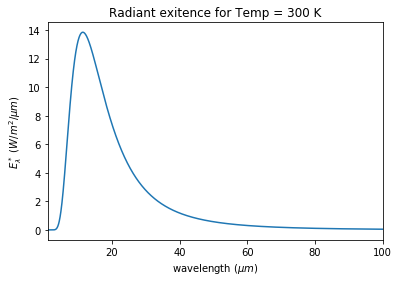

In [4]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
#
# change units from meters to microns to get prettier numbers
#
ax.plot(wavelengths*1.e6,flux*1.e-6)
ax.set(xlim=(1,100),xlabel="wavelength ($\mu m$)",ylabel=r"$E^*_\lambda\ (W/m^2/\mu m$)",
        title='Radiant exitence for Temp = 300 K');

## 